In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from helpers.table_helpers import grouper
from helpers.figure_helpers import groupby_plotter, heatmap, make_hist_by_panel
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
merge_path = os.path.join(os.getcwd(), '..', '..', 'data', 'merged')
table_path = os.path.join(os.getcwd(), '..', '..', 'tables')
final_path = os.path.join(os.getcwd(), '..', '..', 'data', 'final')
figure_path = os.path.join(os.path.join(os.getcwd(), '..', '..', 'figures'))
df = pd.read_excel(os.path.join(merge_path, 'merged_ref_data_exc_output.xlsx'),
                   index_col=0)
uniq = df.drop_duplicates(subset=['Institution name', 'Unit of assessment number'])

In [2]:
grp_by = ['Main panel']
grouper(df, uniq, grp_by, table_path, 'Panel_groupby.csv')

,Main panel,Number ICS,% Total ICS,FTE,Doctoral Degrees,Total Income (£bn)
0,A,1419,22.31,19763.11,46854.13,22.41
1,B,1268,19.93,17972.29,51859.17,14.34
2,C,2146,33.74,23292.24,38122.04,3.61
3,D,1528,24.02,13946.03,22685.49,1.25


In [3]:
grp_by = ['Main panel', 'Unit of assessment name']
grouper(df, uniq, grp_by, table_path, 'UOA_groupby.csv')

,Main panel,Unit of assessment name,Number ICS,% Total ICS,FTE,Doctoral Degrees,Total Income (£bn)
0,A,"Agriculture, Food and Veterinary Sciences",103,1.62,1293.00,2904.16,1.03
1,A,"Allied Health Professions, Dentistry, Nursing ...",393,6.18,4703.83,9203.27,1.69
2,A,Biological Sciences,192,3.02,2816.49,9245.30,3.90
3,A,Clinical Medicine,254,3.99,4878.50,12174.02,9.88
4,A,"Psychology, Psychiatry and Neuroscience",326,5.12,4039.77,10528.31,2.68
5,A,"Public Health, Health Services and Primary Care",151,2.37,2031.52,2799.07,3.23
6,B,Chemistry,113,1.78,1389.02,6687.21,1.55
7,B,Computer Science and Informatics,271,4.26,2937.61,6517.63,1.35
8,B,Earth Systems and Environmental Sciences,148,2.33,1771.97,4061.62,1.27
9,B,Engineering,391,6.15,7252.89,23725.02,6.97


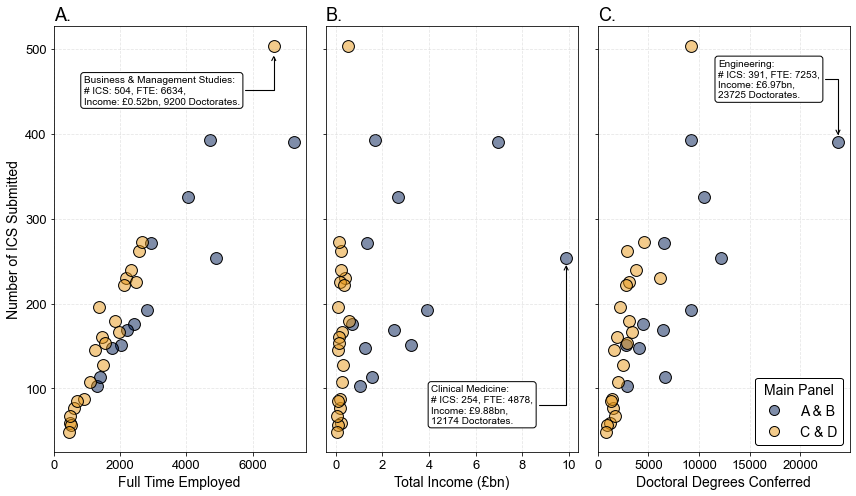

In [4]:
groupby_plotter(grouper(df, uniq, grp_by, table_path, 'UOA_groupby.csv'),
                figure_path,'Number_ICS_Submitted')

In [5]:
dfA = df[df['Main panel']=='A'].groupby('Summary impact type')['Summary impact type'].count()
dfB = df[df['Main panel']=='B'].groupby('Summary impact type')['Summary impact type'].count()
dfC = df[df['Main panel']=='C'].groupby('Summary impact type')['Summary impact type'].count()
dfD = df[df['Main panel']=='D'].groupby('Summary impact type')['Summary impact type'].count()
dfA = pd.DataFrame(dfA).rename({'Summary impact type': 'Panel: A'}, axis=1)
dfB = pd.DataFrame(dfB).rename({'Summary impact type': 'Panel: B'}, axis=1)
dfC = pd.DataFrame(dfC).rename({'Summary impact type': 'Panel: C'}, axis=1)
dfD = pd.DataFrame(dfD).rename({'Summary impact type': 'Panel: D'}, axis=1)
df_merge = pd.merge(pd.DataFrame(dfA), pd.DataFrame(dfB), how='left', left_index=True, right_index=True)
df_merge = pd.merge(df_merge, pd.DataFrame(dfC), how='left', left_index=True, right_index=True)
df_merge = pd.merge(df_merge, pd.DataFrame(dfD), how='left', left_index=True, right_index=True)


(12, 6)


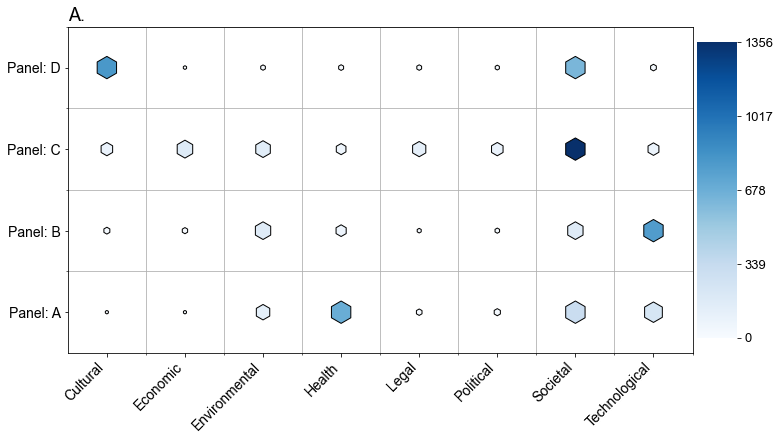

In [6]:
a = df_merge.melt(ignore_index=False).reset_index()
heatmap(
    x=a['Summary impact type'],
    y=a['variable'],
    figsize = (12, 6),
    figure_path = figure_path,
    filename = 'panel_by_type',
    size=a['value'],
    color=a['value'],
    color_range=[0, a['value'].max()],
    marker='h'
)

PermissionError: [Errno 13] Permission denied: 'C:\\Dropbox\\ICS_Analysis\\src\\analysis\\..\\..\\figures\\sentiment_by_panel.pdf'

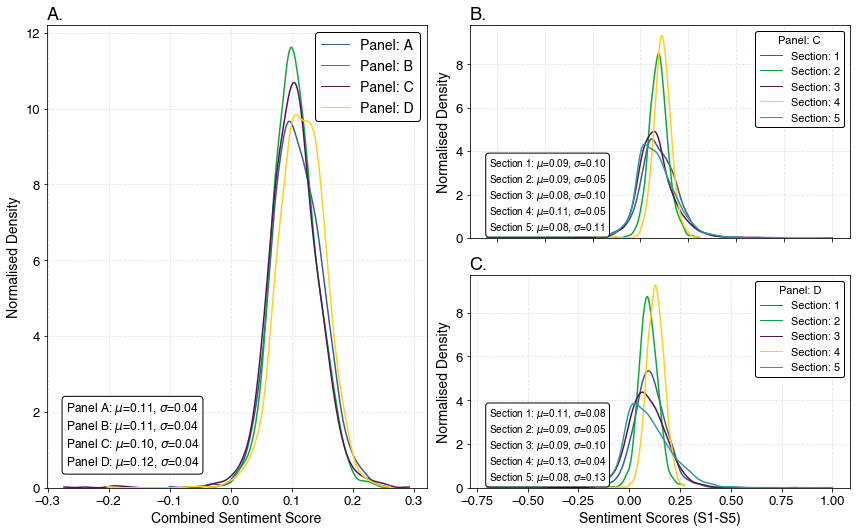

In [7]:
dfe = pd.read_pickle(os.path.join(merge_path, 'merged_with_text_features.pkl'))
make_hist_by_panel(dfe, figure_path, 'sentiment_by_panel', 'sentiment', True)

In [ ]:
make_hist_by_panel(dfe, figure_path, 'flesch_by_panel', 'flesch', False)